# Adult and child longevity in relation to sanitation in developing countries: Revisited

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# A brief intro since this is a Revisit

<a id='intro'></a>
## Introduction

Gapminder was chosen for this data analysis. This set has information about indicators including but not limited to:
- Economics
- Population
- Work
- Infrastructure
- Health



**For the purpose of this project, longevity against sanitation is investigated.** 

**Three variables related to health were chosen against overall access to sanitation:**

**1 - Child mortality (0-5 years old)/1000 children**

**2 - Male life expectancy**

**3 - Female life expectancy**

Overall sanitation dataset was found out to cover data **only for 2000 to 2017.** 

Contrarily, child mortality covers 1800 to 2100, and both life expectancy sets cover 1950 to 2099. 

Therefore, **only the period 2000 to 2017** has been chosen for investigation for **all datasets.**

**We ask the three following questions:**
- **Question 1: How does sanitation change over the years?**


- **Question 2: How does change in sanitation correlate with longevity in children and adults?**


- **Question 3: Does change in sanitation affect male and female longevity differently?**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


## Gathering

In [2]:
child = pd.read_csv('child_mortality_0_5_year_olds_dying_per_1000_born.csv')
male = pd.read_csv('life_expectancy_male.csv')
female = pd.read_csv('life_expectancy_female.csv')
sanitation = pd.read_csv('at_least_basic_sanitation_overall_access_percent.csv')

In [3]:
#checking that columns are object type
child.columns

Index(['country', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808',
       ...
       '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099',
       '2100'],
      dtype='object', length=302)

In [4]:
male.columns

Index(['country', '1950', '1951', '1952', '1953', '1954', '1955', '1956',
       '1957', '1958',
       ...
       '2090', '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098',
       '2099'],
      dtype='object', length=151)

In [5]:
female.columns

Index(['country', '1950', '1951', '1952', '1953', '1954', '1955', '1956',
       '1957', '1958',
       ...
       '2090', '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098',
       '2099'],
      dtype='object', length=151)

In [6]:
sanitation.columns

Index(['country', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017'],
      dtype='object')

In [7]:
# a list for numbers 2000-2017
chosen = []
for i in range(2000,2018):
    i = str(i)
    chosen.append(i)
chosen.append('country')

In [8]:
# A function to cut all unchosen columns since the process repeats
def column_cut(df):
    for column in df:
        if column not in chosen:
            df.drop(columns = column, inplace = True)
    return df

In [9]:
#dropping all other columns in child
column_cut(child)

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,129.00,125.00,121.00,117.00,113.00,109.00,104.00,100.00,96.00,91.90,88.00,84.10,80.50,77.00,73.50,70.40,67.50,64.70
1,Angola,206.00,200.00,193.00,185.00,176.00,167.00,157.00,148.00,138.00,129.00,120.00,113.00,105.00,98.40,92.90,88.10,84.00,80.40
2,Albania,25.90,24.50,23.10,21.80,20.40,19.20,17.90,16.70,15.50,14.40,13.30,12.30,11.40,10.70,10.10,9.60,9.27,9.02
3,Andorra,6.41,6.16,5.93,5.71,5.49,5.27,5.05,4.84,4.62,4.39,4.18,3.98,3.79,3.61,3.43,3.27,3.14,3.01
4,United Arab Emirates,11.20,10.90,10.60,10.30,10.00,9.73,9.44,9.18,8.93,8.69,8.48,8.28,8.13,8.00,7.91,7.83,7.76,7.68
5,Argentina,19.60,18.90,18.30,17.70,17.10,16.50,16.10,15.70,15.30,14.90,14.40,13.90,13.30,12.70,12.10,11.50,10.90,10.40
6,Armenia,30.80,29.30,27.80,26.50,25.20,23.90,22.70,21.60,20.50,19.50,18.50,17.60,16.70,15.90,15.10,14.40,13.70,13.00
7,Antigua and Barbuda,15.80,15.10,14.40,13.70,13.10,12.50,11.90,11.30,10.80,10.20,9.59,9.04,8.52,8.04,7.64,7.29,6.97,6.69
8,Australia,6.19,6.08,5.99,5.91,5.82,5.72,5.59,5.41,5.21,4.99,4.77,4.54,4.32,4.13,3.98,3.87,3.79,3.74
9,Austria,5.50,5.41,5.31,5.20,5.05,4.90,4.76,4.65,4.54,4.44,4.33,4.20,4.05,3.91,3.80,3.71,3.65,3.58


In [10]:
child

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,129.00,125.00,121.00,117.00,113.00,109.00,104.00,100.00,96.00,91.90,88.00,84.10,80.50,77.00,73.50,70.40,67.50,64.70
1,Angola,206.00,200.00,193.00,185.00,176.00,167.00,157.00,148.00,138.00,129.00,120.00,113.00,105.00,98.40,92.90,88.10,84.00,80.40
2,Albania,25.90,24.50,23.10,21.80,20.40,19.20,17.90,16.70,15.50,14.40,13.30,12.30,11.40,10.70,10.10,9.60,9.27,9.02
3,Andorra,6.41,6.16,5.93,5.71,5.49,5.27,5.05,4.84,4.62,4.39,4.18,3.98,3.79,3.61,3.43,3.27,3.14,3.01
4,United Arab Emirates,11.20,10.90,10.60,10.30,10.00,9.73,9.44,9.18,8.93,8.69,8.48,8.28,8.13,8.00,7.91,7.83,7.76,7.68
5,Argentina,19.60,18.90,18.30,17.70,17.10,16.50,16.10,15.70,15.30,14.90,14.40,13.90,13.30,12.70,12.10,11.50,10.90,10.40
6,Armenia,30.80,29.30,27.80,26.50,25.20,23.90,22.70,21.60,20.50,19.50,18.50,17.60,16.70,15.90,15.10,14.40,13.70,13.00
7,Antigua and Barbuda,15.80,15.10,14.40,13.70,13.10,12.50,11.90,11.30,10.80,10.20,9.59,9.04,8.52,8.04,7.64,7.29,6.97,6.69
8,Australia,6.19,6.08,5.99,5.91,5.82,5.72,5.59,5.41,5.21,4.99,4.77,4.54,4.32,4.13,3.98,3.87,3.79,3.74
9,Austria,5.50,5.41,5.31,5.20,5.05,4.90,4.76,4.65,4.54,4.44,4.33,4.20,4.05,3.91,3.80,3.71,3.65,3.58


In [11]:
#repeating the process form male and female
column_cut(male)

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,71.3,71.4,71.5,71.6,71.7,71.8,72.0,72.1,72.2,72.4,72.5,72.7,72.8,72.9,73.1,73.2,73.3,73.5
1,Afghanistan,54.7,55.1,55.6,56.1,56.5,57.0,57.6,58.1,58.6,59.2,59.7,60.2,60.7,61.1,61.6,62.0,62.3,62.7
2,Angola,44.5,45.0,45.6,46.3,47.0,47.9,48.8,49.8,50.8,51.9,52.8,53.8,54.7,55.4,56.1,56.7,57.2,57.7
3,Albania,71.2,71.6,72.0,72.2,72.5,72.7,72.9,73.2,73.4,73.8,74.1,74.6,75.0,75.4,75.7,76.1,76.4,76.6
4,United Arab Emirates,73.5,73.7,74.0,74.2,74.4,74.6,74.8,75.0,75.2,75.4,75.6,75.8,76.0,76.2,76.4,76.6,76.8,77.0
5,Argentina,70.1,70.3,70.5,70.7,70.8,71.0,71.2,71.3,71.5,71.7,71.8,72.0,72.2,72.3,72.5,72.6,72.8,72.9
6,Armenia,68.1,68.5,68.8,69.1,69.2,69.3,69.4,69.5,69.6,69.8,70.0,70.2,70.4,70.6,70.8,70.9,71.0,71.1
7,Antigua and Barbuda,72.4,72.7,72.9,73.1,73.4,73.6,73.8,74.0,74.1,74.3,74.4,74.6,74.7,74.9,75.1,75.2,75.4,75.6
8,Australia,76.9,77.3,77.6,77.9,78.3,78.6,78.8,79.1,79.3,79.5,79.8,80.0,80.2,80.4,80.6,80.8,80.9,81.1
9,Austria,75.1,75.4,75.7,76.1,76.4,76.6,76.9,77.2,77.4,77.7,77.9,78.1,78.3,78.4,78.5,78.6,78.7,78.9


In [12]:
male

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,71.3,71.4,71.5,71.6,71.7,71.8,72.0,72.1,72.2,72.4,72.5,72.7,72.8,72.9,73.1,73.2,73.3,73.5
1,Afghanistan,54.7,55.1,55.6,56.1,56.5,57.0,57.6,58.1,58.6,59.2,59.7,60.2,60.7,61.1,61.6,62.0,62.3,62.7
2,Angola,44.5,45.0,45.6,46.3,47.0,47.9,48.8,49.8,50.8,51.9,52.8,53.8,54.7,55.4,56.1,56.7,57.2,57.7
3,Albania,71.2,71.6,72.0,72.2,72.5,72.7,72.9,73.2,73.4,73.8,74.1,74.6,75.0,75.4,75.7,76.1,76.4,76.6
4,United Arab Emirates,73.5,73.7,74.0,74.2,74.4,74.6,74.8,75.0,75.2,75.4,75.6,75.8,76.0,76.2,76.4,76.6,76.8,77.0
5,Argentina,70.1,70.3,70.5,70.7,70.8,71.0,71.2,71.3,71.5,71.7,71.8,72.0,72.2,72.3,72.5,72.6,72.8,72.9
6,Armenia,68.1,68.5,68.8,69.1,69.2,69.3,69.4,69.5,69.6,69.8,70.0,70.2,70.4,70.6,70.8,70.9,71.0,71.1
7,Antigua and Barbuda,72.4,72.7,72.9,73.1,73.4,73.6,73.8,74.0,74.1,74.3,74.4,74.6,74.7,74.9,75.1,75.2,75.4,75.6
8,Australia,76.9,77.3,77.6,77.9,78.3,78.6,78.8,79.1,79.3,79.5,79.8,80.0,80.2,80.4,80.6,80.8,80.9,81.1
9,Austria,75.1,75.4,75.7,76.1,76.4,76.6,76.9,77.2,77.4,77.7,77.9,78.1,78.3,78.4,78.5,78.6,78.7,78.9


In [13]:
column_cut(female)

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,76.3,76.3,76.4,76.5,76.6,76.7,76.8,77.0,77.1,77.3,77.4,77.6,77.7,77.8,78.0,78.1,78.2,78.4
1,Afghanistan,57.1,57.6,58.1,58.6,59.1,59.6,60.2,60.8,61.3,61.9,62.5,63.0,63.5,64.0,64.5,64.9,65.3,65.7
2,Angola,48.7,49.3,50.0,50.8,51.7,52.6,53.6,54.7,55.8,57.0,58.0,59.1,60.0,60.8,61.6,62.2,62.8,63.3
3,Albania,77.0,77.3,77.5,77.8,78.0,78.2,78.3,78.6,78.8,79.0,79.3,79.6,79.8,79.9,80.0,80.1,80.1,80.1
4,United Arab Emirates,75.7,76.0,76.2,76.4,76.6,76.8,77.0,77.2,77.4,77.6,77.8,78.0,78.1,78.3,78.5,78.7,78.8,79.0
5,Argentina,77.0,77.2,77.3,77.5,77.7,77.8,78.0,78.2,78.3,78.5,78.6,78.8,79.0,79.1,79.3,79.4,79.6,79.7
6,Armenia,74.5,74.8,75.1,75.3,75.5,75.6,75.8,75.9,76.0,76.2,76.4,76.6,76.9,77.2,77.4,77.7,77.9,78.2
7,Antigua and Barbuda,75.4,75.6,75.8,76.0,76.2,76.3,76.5,76.7,76.8,77.0,77.1,77.2,77.4,77.5,77.6,77.7,77.8,77.9
8,Australia,82.3,82.5,82.7,82.9,83.1,83.3,83.5,83.7,83.8,84.0,84.1,84.3,84.4,84.5,84.7,84.8,85.0,85.1
9,Austria,81.1,81.4,81.6,81.8,82.1,82.3,82.5,82.7,82.9,83.0,83.2,83.3,83.4,83.5,83.6,83.6,83.7,83.7


In [14]:
female

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,76.3,76.3,76.4,76.5,76.6,76.7,76.8,77.0,77.1,77.3,77.4,77.6,77.7,77.8,78.0,78.1,78.2,78.4
1,Afghanistan,57.1,57.6,58.1,58.6,59.1,59.6,60.2,60.8,61.3,61.9,62.5,63.0,63.5,64.0,64.5,64.9,65.3,65.7
2,Angola,48.7,49.3,50.0,50.8,51.7,52.6,53.6,54.7,55.8,57.0,58.0,59.1,60.0,60.8,61.6,62.2,62.8,63.3
3,Albania,77.0,77.3,77.5,77.8,78.0,78.2,78.3,78.6,78.8,79.0,79.3,79.6,79.8,79.9,80.0,80.1,80.1,80.1
4,United Arab Emirates,75.7,76.0,76.2,76.4,76.6,76.8,77.0,77.2,77.4,77.6,77.8,78.0,78.1,78.3,78.5,78.7,78.8,79.0
5,Argentina,77.0,77.2,77.3,77.5,77.7,77.8,78.0,78.2,78.3,78.5,78.6,78.8,79.0,79.1,79.3,79.4,79.6,79.7
6,Armenia,74.5,74.8,75.1,75.3,75.5,75.6,75.8,75.9,76.0,76.2,76.4,76.6,76.9,77.2,77.4,77.7,77.9,78.2
7,Antigua and Barbuda,75.4,75.6,75.8,76.0,76.2,76.3,76.5,76.7,76.8,77.0,77.1,77.2,77.4,77.5,77.6,77.7,77.8,77.9
8,Australia,82.3,82.5,82.7,82.9,83.1,83.3,83.5,83.7,83.8,84.0,84.1,84.3,84.4,84.5,84.7,84.8,85.0,85.1
9,Austria,81.1,81.4,81.6,81.8,82.1,82.3,82.5,82.7,82.9,83.0,83.2,83.3,83.4,83.5,83.6,83.6,83.7,83.7


## Assessing

## visual

- Inconsistencies in rows number

### programmatic

- NaN values in sanitation

In [15]:
child.isnull().sum()

country    0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
dtype: int64

In [16]:
child.isnull().sum()

country    0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
dtype: int64

In [17]:
male.isnull().sum()

country    0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
dtype: int64

In [18]:
female.isnull().sum()

country    0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
dtype: int64

In [19]:
sanitation.isnull().sum()

country     0
2000       13
2001        9
2002        7
2003        7
2004        7
2005        6
2006        4
2007        2
2008        2
2009        1
2010        1
2011        0
2012        0
2013        0
2014        1
2015        1
2016        4
2017       11
dtype: int64

## Cleaning

## visual

- reset according to the lowest rows number

In [20]:
# first we make copies for cleaning 
childc = child.copy()
malec = male.copy()
femalec = female.copy()
sanitationc = sanitation.copy()


In [21]:
# then reset all according to child
sanitationc= sanitationc[~np.logical_not(sanitationc.country.isin(list(childc.country)))] 


In [22]:
sanitationc

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,Afghanistan,23.50,23.5,24.60,25.80,26.9,28.0,29.2,30.4,31.7,32.9,34.2,35.5,36.70,38.1,39.40,40.70,42.10,43.40
2,Angola,27.60,29.0,30.40,31.90,33.3,34.7,36.0,37.3,38.5,39.8,41.1,42.3,43.60,44.9,46.10,47.40,48.60,49.90
3,Albania,88.30,89.1,89.90,90.70,91.4,92.2,92.9,93.6,94.3,94.9,95.6,96.2,96.80,97.3,97.70,97.70,97.70,97.70
4,Andorra,100.00,100.0,100.00,100.00,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.0,100.00,100.00,100.00,100.00
5,United Arab Emirates,98.50,98.5,98.50,98.50,98.5,98.5,98.5,98.5,98.5,98.6,98.6,98.6,98.60,98.6,98.60,98.60,98.60,98.60
6,Argentina,87.00,87.5,88.10,88.70,89.2,89.8,90.4,90.9,91.5,92.1,92.6,93.2,93.70,94.2,94.20,94.20,94.30,NaN
7,Armenia,86.90,87.3,87.70,88.10,88.5,88.9,89.3,89.7,90.1,90.5,91.0,91.4,91.80,92.2,92.60,93.10,93.40,93.60
9,Antigua and Barbuda,82.40,82.8,83.20,83.60,84.0,84.4,84.8,85.2,85.5,85.9,86.3,86.7,87.10,87.5,87.50,87.50,87.50,87.50
10,Australia,100.00,100.0,100.00,100.00,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.0,100.00,100.00,100.00,100.00
11,Austria,100.00,100.0,100.00,100.00,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.0,100.00,100.00,100.00,100.00


In [23]:
malec = malec[~np.logical_not(malec.country.isin(list(childc.country)))]


In [24]:
malec

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,Afghanistan,54.7,55.1,55.6,56.1,56.5,57.0,57.6,58.1,58.6,59.2,59.7,60.2,60.7,61.1,61.6,62.0,62.3,62.7
2,Angola,44.5,45.0,45.6,46.3,47.0,47.9,48.8,49.8,50.8,51.9,52.8,53.8,54.7,55.4,56.1,56.7,57.2,57.7
3,Albania,71.2,71.6,72.0,72.2,72.5,72.7,72.9,73.2,73.4,73.8,74.1,74.6,75.0,75.4,75.7,76.1,76.4,76.6
4,United Arab Emirates,73.5,73.7,74.0,74.2,74.4,74.6,74.8,75.0,75.2,75.4,75.6,75.8,76.0,76.2,76.4,76.6,76.8,77.0
5,Argentina,70.1,70.3,70.5,70.7,70.8,71.0,71.2,71.3,71.5,71.7,71.8,72.0,72.2,72.3,72.5,72.6,72.8,72.9
6,Armenia,68.1,68.5,68.8,69.1,69.2,69.3,69.4,69.5,69.6,69.8,70.0,70.2,70.4,70.6,70.8,70.9,71.0,71.1
7,Antigua and Barbuda,72.4,72.7,72.9,73.1,73.4,73.6,73.8,74.0,74.1,74.3,74.4,74.6,74.7,74.9,75.1,75.2,75.4,75.6
8,Australia,76.9,77.3,77.6,77.9,78.3,78.6,78.8,79.1,79.3,79.5,79.8,80.0,80.2,80.4,80.6,80.8,80.9,81.1
9,Austria,75.1,75.4,75.7,76.1,76.4,76.6,76.9,77.2,77.4,77.7,77.9,78.1,78.3,78.4,78.5,78.6,78.7,78.9
10,Azerbaijan,63.6,64.0,64.4,64.9,65.3,65.7,66.2,66.6,67.0,67.4,67.8,68.1,68.5,68.8,69.2,69.5,69.9,70.1


In [25]:
femalec = femalec[~np.logical_not(femalec.country.isin(list(childc.country)))]


In [26]:
femalec

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,Afghanistan,57.1,57.6,58.1,58.6,59.1,59.6,60.2,60.8,61.3,61.9,62.5,63.0,63.5,64.0,64.5,64.9,65.3,65.7
2,Angola,48.7,49.3,50.0,50.8,51.7,52.6,53.6,54.7,55.8,57.0,58.0,59.1,60.0,60.8,61.6,62.2,62.8,63.3
3,Albania,77.0,77.3,77.5,77.8,78.0,78.2,78.3,78.6,78.8,79.0,79.3,79.6,79.8,79.9,80.0,80.1,80.1,80.1
4,United Arab Emirates,75.7,76.0,76.2,76.4,76.6,76.8,77.0,77.2,77.4,77.6,77.8,78.0,78.1,78.3,78.5,78.7,78.8,79.0
5,Argentina,77.0,77.2,77.3,77.5,77.7,77.8,78.0,78.2,78.3,78.5,78.6,78.8,79.0,79.1,79.3,79.4,79.6,79.7
6,Armenia,74.5,74.8,75.1,75.3,75.5,75.6,75.8,75.9,76.0,76.2,76.4,76.6,76.9,77.2,77.4,77.7,77.9,78.2
7,Antigua and Barbuda,75.4,75.6,75.8,76.0,76.2,76.3,76.5,76.7,76.8,77.0,77.1,77.2,77.4,77.5,77.6,77.7,77.8,77.9
8,Australia,82.3,82.5,82.7,82.9,83.1,83.3,83.5,83.7,83.8,84.0,84.1,84.3,84.4,84.5,84.7,84.8,85.0,85.1
9,Austria,81.1,81.4,81.6,81.8,82.1,82.3,82.5,82.7,82.9,83.0,83.2,83.3,83.4,83.5,83.6,83.6,83.7,83.7
10,Azerbaijan,69.9,70.1,70.3,70.7,71.2,71.8,72.3,72.9,73.4,73.8,74.1,74.4,74.5,74.7,74.8,75.0,75.1,75.2


In [27]:
# since the resulting male and female are less than child, we reset accordingly
childc = childc[~np.logical_not(childc.country.isin(list(malec.country)))]


In [28]:
sanitationc = sanitationc[~np.logical_not(sanitationc.country.isin(list(malec.country)))]


In [29]:
sanitationc

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,Afghanistan,23.50,23.5,24.60,25.80,26.9,28.0,29.2,30.4,31.7,32.9,34.2,35.5,36.70,38.1,39.40,40.70,42.10,43.40
2,Angola,27.60,29.0,30.40,31.90,33.3,34.7,36.0,37.3,38.5,39.8,41.1,42.3,43.60,44.9,46.10,47.40,48.60,49.90
3,Albania,88.30,89.1,89.90,90.70,91.4,92.2,92.9,93.6,94.3,94.9,95.6,96.2,96.80,97.3,97.70,97.70,97.70,97.70
5,United Arab Emirates,98.50,98.5,98.50,98.50,98.5,98.5,98.5,98.5,98.5,98.6,98.6,98.6,98.60,98.6,98.60,98.60,98.60,98.60
6,Argentina,87.00,87.5,88.10,88.70,89.2,89.8,90.4,90.9,91.5,92.1,92.6,93.2,93.70,94.2,94.20,94.20,94.30,NaN
7,Armenia,86.90,87.3,87.70,88.10,88.5,88.9,89.3,89.7,90.1,90.5,91.0,91.4,91.80,92.2,92.60,93.10,93.40,93.60
9,Antigua and Barbuda,82.40,82.8,83.20,83.60,84.0,84.4,84.8,85.2,85.5,85.9,86.3,86.7,87.10,87.5,87.50,87.50,87.50,87.50
10,Australia,100.00,100.0,100.00,100.00,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.0,100.00,100.00,100.00,100.00
11,Austria,100.00,100.0,100.00,100.00,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.0,100.00,100.00,100.00,100.00
12,Azerbaijan,63.20,64.8,66.40,67.90,69.5,71.6,73.8,75.9,78.1,80.3,82.5,84.8,87.00,89.3,90.90,92.50,92.50,92.50


In [30]:
childc

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,129.00,125.00,121.00,117.00,113.00,109.00,104.00,100.00,96.00,91.90,88.00,84.10,80.50,77.00,73.50,70.40,67.50,64.70
1,Angola,206.00,200.00,193.00,185.00,176.00,167.00,157.00,148.00,138.00,129.00,120.00,113.00,105.00,98.40,92.90,88.10,84.00,80.40
2,Albania,25.90,24.50,23.10,21.80,20.40,19.20,17.90,16.70,15.50,14.40,13.30,12.30,11.40,10.70,10.10,9.60,9.27,9.02
4,United Arab Emirates,11.20,10.90,10.60,10.30,10.00,9.73,9.44,9.18,8.93,8.69,8.48,8.28,8.13,8.00,7.91,7.83,7.76,7.68
5,Argentina,19.60,18.90,18.30,17.70,17.10,16.50,16.10,15.70,15.30,14.90,14.40,13.90,13.30,12.70,12.10,11.50,10.90,10.40
6,Armenia,30.80,29.30,27.80,26.50,25.20,23.90,22.70,21.60,20.50,19.50,18.50,17.60,16.70,15.90,15.10,14.40,13.70,13.00
7,Antigua and Barbuda,15.80,15.10,14.40,13.70,13.10,12.50,11.90,11.30,10.80,10.20,9.59,9.04,8.52,8.04,7.64,7.29,6.97,6.69
8,Australia,6.19,6.08,5.99,5.91,5.82,5.72,5.59,5.41,5.21,4.99,4.77,4.54,4.32,4.13,3.98,3.87,3.79,3.74
9,Austria,5.50,5.41,5.31,5.20,5.05,4.90,4.76,4.65,4.54,4.44,4.33,4.20,4.05,3.91,3.80,3.71,3.65,3.58
10,Azerbaijan,75.00,69.80,64.90,60.40,56.20,52.50,49.20,46.00,43.10,40.30,37.60,35.10,32.70,30.40,28.30,26.30,24.50,22.90


In [31]:
#the resulting sanitation has one less row, so reset again
malec = malec[~np.logical_not(malec.country.isin(list(sanitationc.country)))]


In [32]:
malec

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,Afghanistan,54.7,55.1,55.6,56.1,56.5,57.0,57.6,58.1,58.6,59.2,59.7,60.2,60.7,61.1,61.6,62.0,62.3,62.7
2,Angola,44.5,45.0,45.6,46.3,47.0,47.9,48.8,49.8,50.8,51.9,52.8,53.8,54.7,55.4,56.1,56.7,57.2,57.7
3,Albania,71.2,71.6,72.0,72.2,72.5,72.7,72.9,73.2,73.4,73.8,74.1,74.6,75.0,75.4,75.7,76.1,76.4,76.6
4,United Arab Emirates,73.5,73.7,74.0,74.2,74.4,74.6,74.8,75.0,75.2,75.4,75.6,75.8,76.0,76.2,76.4,76.6,76.8,77.0
5,Argentina,70.1,70.3,70.5,70.7,70.8,71.0,71.2,71.3,71.5,71.7,71.8,72.0,72.2,72.3,72.5,72.6,72.8,72.9
6,Armenia,68.1,68.5,68.8,69.1,69.2,69.3,69.4,69.5,69.6,69.8,70.0,70.2,70.4,70.6,70.8,70.9,71.0,71.1
7,Antigua and Barbuda,72.4,72.7,72.9,73.1,73.4,73.6,73.8,74.0,74.1,74.3,74.4,74.6,74.7,74.9,75.1,75.2,75.4,75.6
8,Australia,76.9,77.3,77.6,77.9,78.3,78.6,78.8,79.1,79.3,79.5,79.8,80.0,80.2,80.4,80.6,80.8,80.9,81.1
9,Austria,75.1,75.4,75.7,76.1,76.4,76.6,76.9,77.2,77.4,77.7,77.9,78.1,78.3,78.4,78.5,78.6,78.7,78.9
10,Azerbaijan,63.6,64.0,64.4,64.9,65.3,65.7,66.2,66.6,67.0,67.4,67.8,68.1,68.5,68.8,69.2,69.5,69.9,70.1


In [33]:
femalec = femalec[~np.logical_not(femalec.country.isin(list(sanitationc.country)))]


In [34]:
femalec

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,Afghanistan,57.1,57.6,58.1,58.6,59.1,59.6,60.2,60.8,61.3,61.9,62.5,63.0,63.5,64.0,64.5,64.9,65.3,65.7
2,Angola,48.7,49.3,50.0,50.8,51.7,52.6,53.6,54.7,55.8,57.0,58.0,59.1,60.0,60.8,61.6,62.2,62.8,63.3
3,Albania,77.0,77.3,77.5,77.8,78.0,78.2,78.3,78.6,78.8,79.0,79.3,79.6,79.8,79.9,80.0,80.1,80.1,80.1
4,United Arab Emirates,75.7,76.0,76.2,76.4,76.6,76.8,77.0,77.2,77.4,77.6,77.8,78.0,78.1,78.3,78.5,78.7,78.8,79.0
5,Argentina,77.0,77.2,77.3,77.5,77.7,77.8,78.0,78.2,78.3,78.5,78.6,78.8,79.0,79.1,79.3,79.4,79.6,79.7
6,Armenia,74.5,74.8,75.1,75.3,75.5,75.6,75.8,75.9,76.0,76.2,76.4,76.6,76.9,77.2,77.4,77.7,77.9,78.2
7,Antigua and Barbuda,75.4,75.6,75.8,76.0,76.2,76.3,76.5,76.7,76.8,77.0,77.1,77.2,77.4,77.5,77.6,77.7,77.8,77.9
8,Australia,82.3,82.5,82.7,82.9,83.1,83.3,83.5,83.7,83.8,84.0,84.1,84.3,84.4,84.5,84.7,84.8,85.0,85.1
9,Austria,81.1,81.4,81.6,81.8,82.1,82.3,82.5,82.7,82.9,83.0,83.2,83.3,83.4,83.5,83.6,83.6,83.7,83.7
10,Azerbaijan,69.9,70.1,70.3,70.7,71.2,71.8,72.3,72.9,73.4,73.8,74.1,74.4,74.5,74.7,74.8,75.0,75.1,75.2


In [35]:
childc = childc[~np.logical_not(childc.country.isin(list(sanitationc.country)))]


In [36]:
childc

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,129.00,125.00,121.00,117.00,113.00,109.00,104.00,100.00,96.00,91.90,88.00,84.10,80.50,77.00,73.50,70.40,67.50,64.70
1,Angola,206.00,200.00,193.00,185.00,176.00,167.00,157.00,148.00,138.00,129.00,120.00,113.00,105.00,98.40,92.90,88.10,84.00,80.40
2,Albania,25.90,24.50,23.10,21.80,20.40,19.20,17.90,16.70,15.50,14.40,13.30,12.30,11.40,10.70,10.10,9.60,9.27,9.02
4,United Arab Emirates,11.20,10.90,10.60,10.30,10.00,9.73,9.44,9.18,8.93,8.69,8.48,8.28,8.13,8.00,7.91,7.83,7.76,7.68
5,Argentina,19.60,18.90,18.30,17.70,17.10,16.50,16.10,15.70,15.30,14.90,14.40,13.90,13.30,12.70,12.10,11.50,10.90,10.40
6,Armenia,30.80,29.30,27.80,26.50,25.20,23.90,22.70,21.60,20.50,19.50,18.50,17.60,16.70,15.90,15.10,14.40,13.70,13.00
7,Antigua and Barbuda,15.80,15.10,14.40,13.70,13.10,12.50,11.90,11.30,10.80,10.20,9.59,9.04,8.52,8.04,7.64,7.29,6.97,6.69
8,Australia,6.19,6.08,5.99,5.91,5.82,5.72,5.59,5.41,5.21,4.99,4.77,4.54,4.32,4.13,3.98,3.87,3.79,3.74
9,Austria,5.50,5.41,5.31,5.20,5.05,4.90,4.76,4.65,4.54,4.44,4.33,4.20,4.05,3.91,3.80,3.71,3.65,3.58
10,Azerbaijan,75.00,69.80,64.90,60.40,56.20,52.50,49.20,46.00,43.10,40.30,37.60,35.10,32.70,30.40,28.30,26.30,24.50,22.90


## programmatic

In [37]:
# rechecking nans in sanitation
sanitationc.isnull().sum()

country    0
2000       8
2001       7
2002       5
2003       5
2004       5
2005       4
2006       2
2007       1
2008       1
2009       1
2010       1
2011       0
2012       0
2013       0
2014       0
2015       0
2016       1
2017       4
dtype: int64

- Only sanitation has nan. So, will be replaced with zeros. We shall conduct this analysis considering that unreported sanitation access percentage is zero. Additionally, the number of nan in a columns could be at most 8. Since we shall use means for visualizations, the error that would result is acceptable.

In [38]:
sanitationc.fillna(0, inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [39]:
sanitationc.isnull().sum()

country    0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


 

### Univariate exploration

In [40]:
# a funcation to make a list of all means
def mean_list(df):
    listm = []
    for column in df.columns[1:]:
        listm.append(df[column].mean())
    return listm

sanitationm = mean_list(sanitationc)



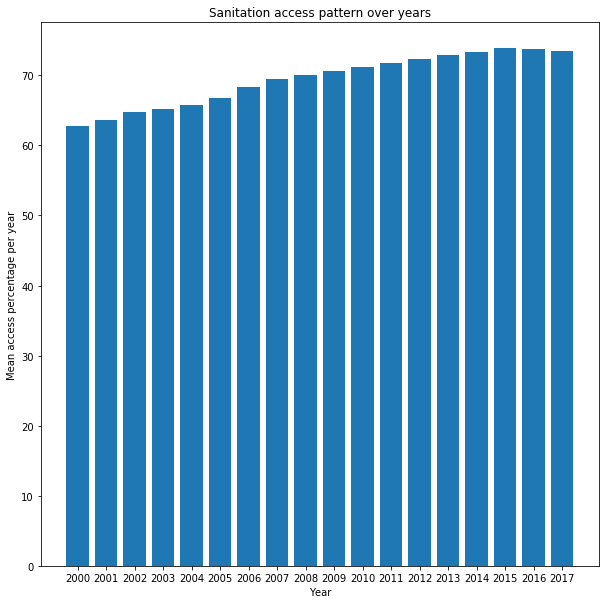

In [41]:
# now drawing the plot, resizing this was by the help of https://stackoverflow.com/questions/48429156/how-to-resize-matplotlib-scatter-plot
# plotting a bar plot to have insight into sanitation access change over years
plt.figure(figsize=(10,10))
plt.bar(male.columns[1:], sanitationm)
plt.title('Sanitation access pattern over years')
plt.xlabel('Year')
plt.ylabel('Mean access percentage per year');



In [42]:
childm = mean_list(childc)


In [43]:
childm

[58.018540540540542,
 55.896864864864853,
 53.678972972972979,
 51.539081081081079,
 49.560432432432435,
 47.402918918918921,
 45.419945945945962,
 43.509297297297302,
 41.786702702702705,
 39.927945945945943,
 38.877243243243242,
 36.654270270270267,
 35.209783783783784,
 33.883351351351351,
 32.681243243243244,
 31.557567567567567,
 30.501081081081086,
 29.481675675675678]

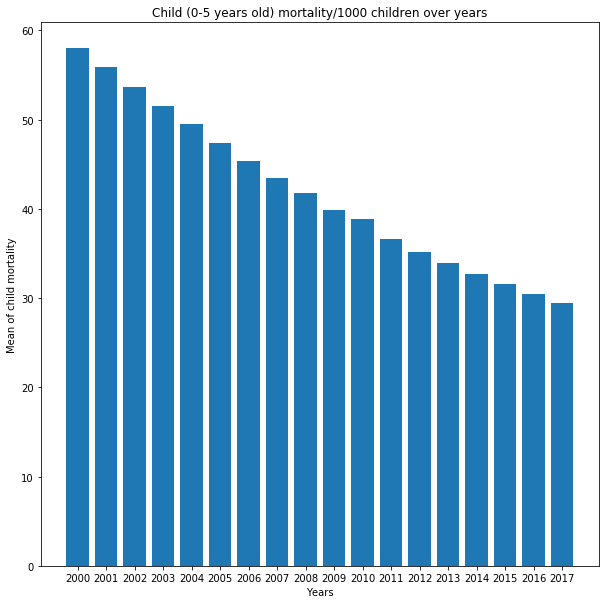

In [44]:
# after the previous plot showd increase in sanitation over years
# repeat the same for child mortality over years
plt.figure(figsize=(10,10))
plt.bar(male.columns[1:], childm)
plt.title('Child (0-5 years old) mortality/1000 children over years')
plt.xlabel('Years')
plt.ylabel('Mean of child mortality');

- As we see, child mortality declines over years, as would be expected.

In [45]:
malem = mean_list(malec)


In [46]:
malem

[63.937297297297306,
 64.224324324324328,
 64.523783783783784,
 64.838918918918921,
 65.169729729729724,
 65.511351351351351,
 65.874054054054056,
 66.248648648648654,
 66.62864864864865,
 67.018378378378372,
 67.401081081081088,
 67.776756756756754,
 68.138378378378377,
 68.481081081081086,
 68.80594594594595,
 69.107567567567571,
 69.377837837837845,
 69.631891891891897]

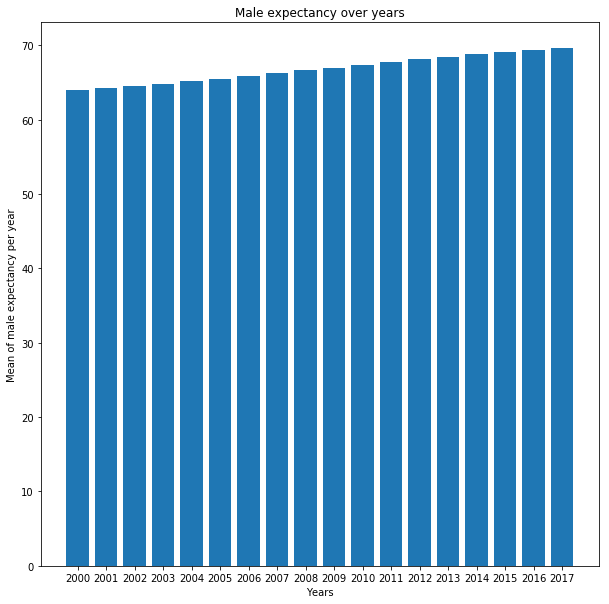

In [47]:
# now checking male and female expectancy in the same manner
# first, male expectancy
plt.figure(figsize=(10,10))
plt.bar(male.columns[1:], malem)
plt.title('Male expectancy over years')
plt.xlabel('Years')
plt.ylabel('Mean of male expectancy per year');

In [48]:
femalem = mean_list(femalec)


In [49]:
femalem

[68.836756756756756,
 69.094054054054055,
 69.371891891891892,
 69.671351351351362,
 69.993513513513506,
 70.335675675675674,
 70.698378378378379,
 71.076216216216224,
 71.461081081081076,
 71.851891891891881,
 72.229729729729726,
 72.605405405405406,
 72.966486486486488,
 73.309189189189183,
 73.63513513513513,
 73.930810810810812,
 74.20756756756758,
 74.450810810810808]

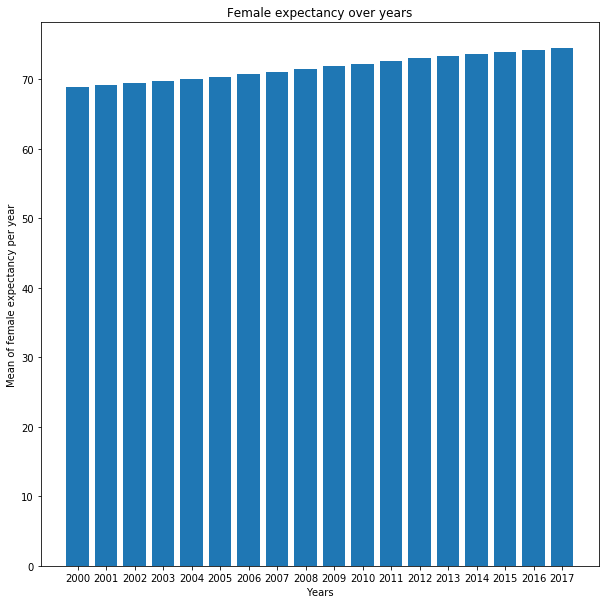

In [50]:
#second, female expectancy:
plt.figure(figsize=(10,10))
plt.bar(male.columns[1:], femalem)
plt.title('Female expectancy over years')
plt.xlabel('Years')
plt.ylabel('Mean of female expectancy per year');

- In univariate exploration, we observe a steady increase in both paramaters over years along with sanitation

### Bivariate exploration


In [51]:
#Creating a new combined df for the means of each variable 
combined = pd.DataFrame(index = chosen[:-1], columns = ['sanitation', 'child', 'male', 'female'])
combined['year'] = chosen[:-1]
combined['sanitation'] = sanitationm
combined['child'] = childm
combined['male'] = malem
combined['female'] = femalem
combined.head(18)

,sanitation,child,male,female,year
2000,62.770649,58.018541,63.937297,68.836757,2000
2001,63.623838,55.896865,64.224324,69.094054,2001
2002,64.719297,53.678973,64.523784,69.371892,2002
2003,65.236649,51.539081,64.838919,69.671351,2003
2004,65.749189,49.560432,65.169730,69.993514,2004
2005,66.795838,47.402919,65.511351,70.335676,2005
2006,68.371027,45.419946,65.874054,70.698378,2006
2007,69.452054,43.509297,66.248649,71.076216,2007
2008,70.022270,41.786703,66.628649,71.461081,2008
2009,70.593568,39.927946,67.018378,71.851892,2009


Text(0.5,1,'Child mortality vs Sanitation')

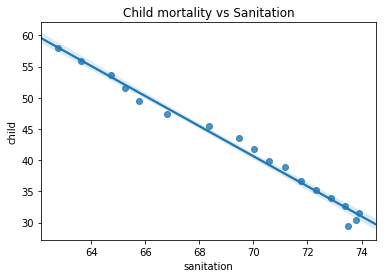

In [52]:
#plotting sanitation against child mortality, and male and female expectancy
# first, a scatter plot for child mortality against sanitation

sb.regplot(data = combined, x ='sanitation', y = 'child');
plt.title('Child mortality vs Sanitation')

Text(0.5,1,'Malel expectancy vs Sanitation')

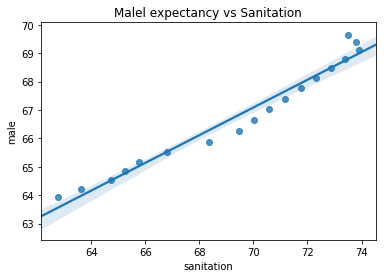

In [53]:
# A similar scatter plot for male expectancy
sb.regplot(data = combined, x ='sanitation', y = 'male');
plt.title('Malel expectancy vs Sanitation')

Text(0.5,1,'Female expectancy vs Sanitation')

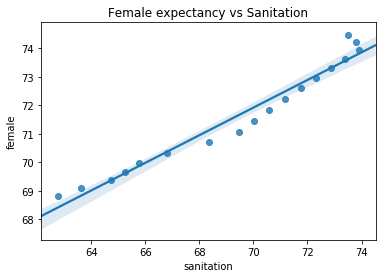

In [54]:
# then for female expectancy
sb.regplot(data = combined, x ='sanitation', y = 'female');
plt.title('Female expectancy vs Sanitation')

- Bivariate exploration shows a strong trend of decline in child mortality, and increase in both gender expectancies, which suggests a correlation between sanitation and longevity

### Multivariate exploration


True


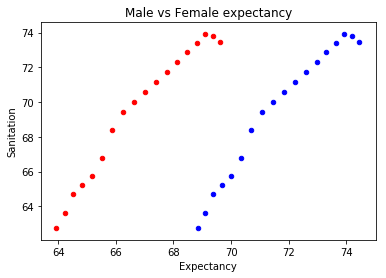

In [55]:
# Comparing between sanitation effects on male and female expectancy
# Used the help of https://stackoverflow.com/questions/43061768/plotting-multiple-scatter-plots-pandas
# To see that, plotting two scatter plots side-by-side using different colors
ax1 = combined.plot(kind='scatter', x= 'male', y='sanitation', color='r')    
ax2 = combined.plot(kind='scatter', x= 'female', y='sanitation', color='b', ax = ax1)    
plt.xlabel('Expectancy')
plt.ylabel('Sanitation')
plt.title('Male vs Female expectancy')
print(ax1 == ax2) 

- Multivariate exploration shows a very similar trend of rising in both expectancies. It's just that female expectancy starts off higher than male expectancy.

<a id='conclusions'></a>
## Conclusions
**Now, back to our initial questions:**
- **Question 1: How does sanitation change over the years?**


- **Question 2: How does change in sanitation correlate with longevity in children and adults?**


- **Question 3: Does change in sanitation affect male and female longevity differently?**



### Question 1: How does sanitation change over the years?**




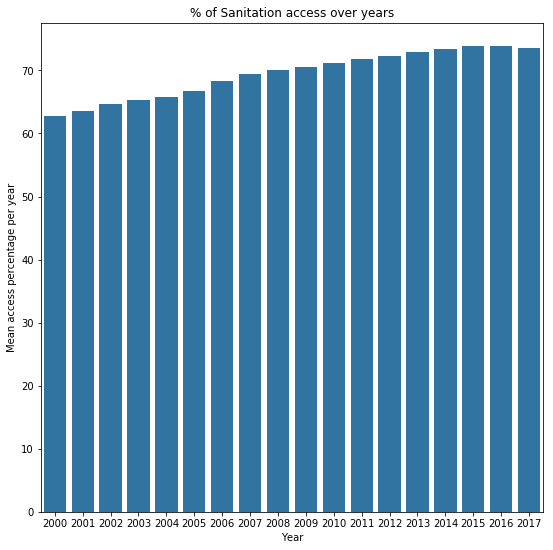

In [56]:
plt.figure(figsize = (9, 9))
sb.barplot(data = combined, x = 'year', y = 'sanitation', color = sb.color_palette()[0])
plt.title('% of Sanitation access over years')
plt.xlabel('Year')
plt.ylabel('Mean access percentage per year');


### We found the mean access to increase from about 63 in 2000 to about 74 in 2015. Then there was a slight drop in 2016 and 2017. 

### Question 2: How does change in sanitation correlate with longevity in children and adults?





#### 1- There is a very clear drop in child mortality from 58 to 30


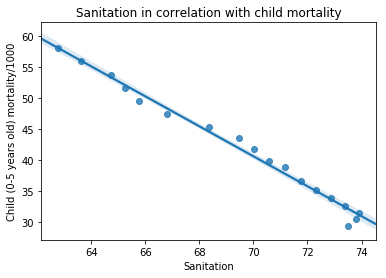

In [57]:
sb.regplot(data = combined, x ='sanitation', y = 'child');
plt.title('Sanitation in correlation with child mortality')
plt.ylabel('Child (0-5 years old) mortality/1000')
plt.xlabel('Sanitation');

#### 2- Male expectancy clearly increases from 63 to 69


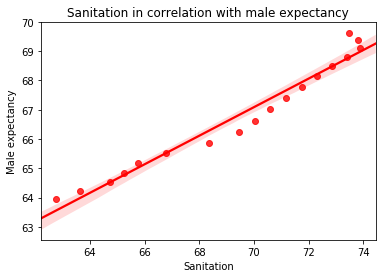

In [58]:
sb.regplot(data = combined, x ='sanitation', y = 'male', color = 'r');
plt.title('Sanitation in correlation with male expectancy')
plt.ylabel('Male expectancy')
plt.xlabel('Sanitation');

#### 3- Female expectancy clearly increases from 69 to 74


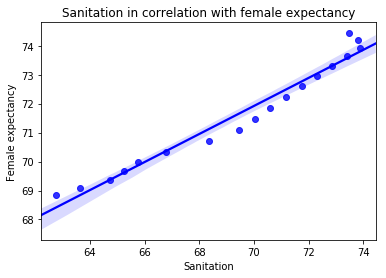

In [59]:
sb.regplot(data = combined, x ='sanitation', y = 'female', color = 'b');
plt.title('Sanitation in correlation with female expectancy')
plt.ylabel('Female expectancy')
plt.xlabel('Sanitation');

### Question 3: Does change in sanitation affect male and female longevity differently?





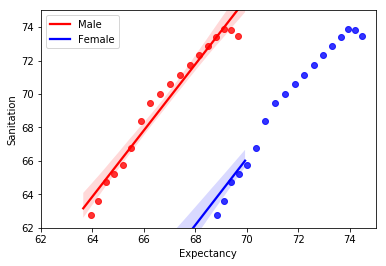

In [60]:
sb.regplot(data = combined, x= 'male', y='sanitation', color='r')    
sb.regplot(data = combined, x= 'female', y='sanitation', color='b')    
plt.xlabel('Expectancy')
plt.ylabel('Sanitation')
plt.xlim([62, 75])
plt.ylim([62, 75])
plt.legend(['Male', 'Female']);

- ### There is no significant difference. It was eleveated for both by about 4 - 5 years, which is likely due to the similar positive effect of sanitataion on both. However, females had higher expectancy in the beginning.

## Thus, the final conclusion is that better sanitaion, as expected, correlates positively with male and female expectancy, and negatively with child mortality. Therefore, it is likely that sanitation correlates with better longevity.

## Limitations

**The previous conclusions could be undermined by some limitations including:**

- NaN values in sanitation dataset. Although few, replacing them by zeros could impact the obtained means. They also affect all correspondences equally. 


- Analysis was according to years, so the changes for each individual country cannot be measured. 

In [61]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'visualization.ipynb'])

0

In [ ]:
!jupyter nbconvert visualization.ipynb --to slides --post serve  --no-input --no-prompt


[NbConvertApp] Converting notebook visualization.ipynb to slides
[NbConvertApp] Writing 394686 bytes to visualization.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/visualization.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not found
/usr/bin/